In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode
from keras.models import load_model
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyttsx3  # require to install espeak (sudo apt/dnf install espeak)

In [ ]:
def get_key(dictionary, val):
    for key, value in dictionary.items():
        if val == value:
            return key

In [ ]:
characters_df = pd.read_csv('../data/test/test-characters.csv')
words_df = pd.read_csv('../data/test/test-words.csv')
static_df = pd.read_csv('../data/test/test-static.csv')
dynamic_df = pd.read_csv('../data/test/test-dynamic.csv')
all_df = pd.read_csv('../data/test/test-all.csv')

In [ ]:
characters_model = load_model('../models/characters.h5')
words_model = load_model('../models/words.h5')
static_model = load_model('../models/static.h5')
dynamic_model = load_model('../models/dynamic.h5')
all_model = load_model('../models/all.h5')

# Characters Test

In [5]:
characters_X = characters_df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
characters_labels = characters_df.iloc[:, -1]
characters_label_dict = {label: i for i, label in enumerate(sorted(set(characters_labels)))}
print(characters_label_dict)
characters_y = np.array([characters_label_dict[label] for label in characters_labels])
characters_y = to_categorical(characters_y, num_classes=len(characters_label_dict))
print(characters_X.shape, characters_y.shape)
characters_X = np.reshape(characters_X, (characters_X.shape[0]//150, 150, characters_X.shape[1]))
characters_y = np.reshape(characters_y, (characters_y.shape[0]//150, 150, characters_y.shape[1]))
print(characters_X.shape, characters_y.shape)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
(195000, 11) (195000, 26)
(1300, 150, 11) (1300, 150, 26)


In [6]:
characters_y_pred = characters_model.predict(characters_X)
characters_predictions = np.argmax(characters_y_pred, axis=2)
print(characters_predictions)
characters_major = mode(characters_predictions, axis=1)[0].squeeze()
characters_count = mode(characters_predictions, axis=1)[1].squeeze()
print(f"Predictions    : {characters_major}")
print(f"Appeared times : {characters_count}")

2023-03-17 21:55:17.119676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-17 21:55:17.124278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-17 21:55:17.127026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

41/41 [==============================] - 3s 43ms/step
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [25 25 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]]


2023-03-17 21:55:19.482600: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20280000 exceeds 10% of free system memory.
/tmp/ipykernel_12934/1211437434.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  characters_major = mode(characters_predictions, axis=1)[0].squeeze()
/tmp/ipykernel_12934/1211437434.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elim

Predictions    : [ 0  0  0 ... 25 25 25]
Appeared times : [150 150 150 ... 150 150 150]


In [7]:
characters_predictions_list = []
for character in characters_major:
    characters_predictions_list.append(get_key(characters_label_dict, character))
print(characters_predictions_list)

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'o', 'o', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'm', 'm', 'm', 'm', 'm', 'n', 'b', 'b', 'c', 'c', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'o', 'c', 'o', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'r', 'r', 'r', 'r', 'r', 'r', 'v', 'u', 'u', 'u', 'c', 'c', 'c', 'c', 'c', 's', 's', 's', 's', 's', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',

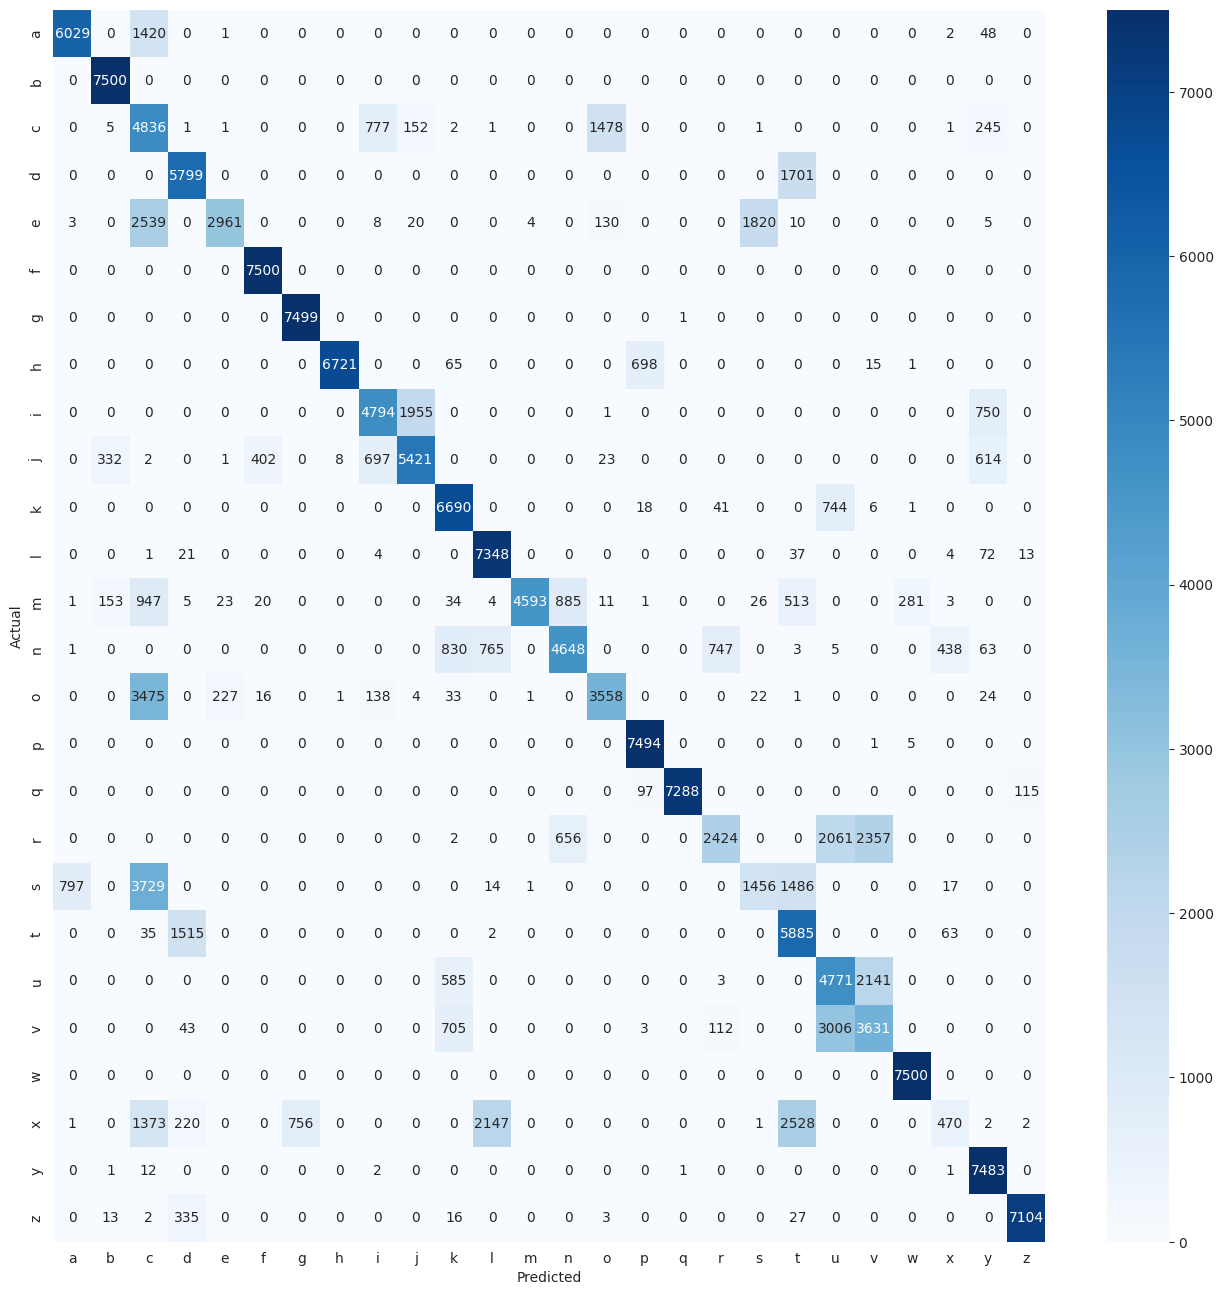

Accuracy: 72.51%


In [8]:
characters_cm = confusion_matrix(characters_y.argmax(axis=2).flatten(), characters_y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(characters_cm, annot=True, cmap='Blues', fmt='g', xticklabels=characters_label_dict.keys(), yticklabels=characters_label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(characters_cm)) / np.sum(characters_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [9]:
print(classification_report(characters_y.argmax(axis=2).flatten(), characters_y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      7500
           1       0.94      1.00      0.97      7500
           2       0.26      0.64      0.37      7500
           3       0.73      0.77      0.75      7500
           4       0.92      0.39      0.55      7500
           5       0.94      1.00      0.97      7500
           6       0.91      1.00      0.95      7500
           7       1.00      0.90      0.94      7500
           8       0.75      0.64      0.69      7500
           9       0.72      0.72      0.72      7500
          10       0.75      0.89      0.81      7500
          11       0.71      0.98      0.83      7500
          12       1.00      0.61      0.76      7500
          13       0.75      0.62      0.68      7500
          14       0.68      0.47      0.56      7500
          15       0.90      1.00      0.95      7500
          16       1.00      0.97      0.99      7500
          17       0.73    

# Words Test

In [10]:
words_X = words_df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
words_labels = words_df.iloc[:, -1]
words_label_dict = {label: i for i, label in enumerate(sorted(set(words_labels)))}
print(words_label_dict)
words_y = np.array([words_label_dict[label] for label in words_labels])
words_y = to_categorical(words_y, num_classes=len(words_label_dict))
print(words_X.shape, words_y.shape)
words_X = np.reshape(words_X, (words_X.shape[0]//150, 150, words_X.shape[1]))
words_y = np.reshape(words_y, (words_y.shape[0]//150, 150, words_y.shape[1]))
print(words_X.shape, words_y.shape)

{'bad': 0, 'deaf': 1, 'fine': 2, 'good': 3, 'goodbye': 4, 'hello': 5, 'hungry': 6, 'me': 7, 'no': 8, 'please': 9, 'sorry': 10, 'thankyou': 11, 'yes': 12, 'you': 13}
(105000, 11) (105000, 14)
(700, 150, 11) (700, 150, 14)


In [11]:
words_y_pred = words_model.predict(words_X)
words_predictions = np.argmax(words_y_pred, axis=2)
print(words_predictions)
words_major = mode(words_predictions, axis=1)[0].squeeze()
words_count = mode(words_predictions, axis=1)[1].squeeze()
print(f"Predictions    : {words_major}")
print(f"Appeared times : {words_count}")

2023-03-17 21:55:26.395260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-17 21:55:26.400085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-17 21:55:26.406324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 2s 28ms/step
[[13 13 13 ...  7  7  7]
 [13 13 13 ...  7  7  7]
 [13 13  7 ...  7  7  7]
 ...
 [ 4  4  4 ... 11 11 11]
 [ 4  4  4 ... 11 11 11]
 [ 4  4  4 ... 11 11 11]]
Predictions    : [ 7  7  7  7  7  7 13  7  7  7  8  8  8  8  8  8  8  8  8  8 11  0 11 11
  0  0 11  4  4  4 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13
 13 13  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3 11
 11 11  0 11  3 11 11 11  5  5  5  5  5  5  4  5  5  5 10 10 10  7 10  7
  7 10  7  7  6  6  6  6  6  6  6  6  6  6  9  9  9  9  9  9  9  9  9  9
  4  4  4  4  4  4  4  4  4  4 11 11 11 11 11 11 11 11 11 11  7  7  7  7
  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8 11  0 11 11 11 11 11  0
  0 11 12 12 12 12 12 12 12 12 12 12  7  7  7  7  7  7  7  7  7  7  1  2
  2 13 13 13 13 13 13 13  2  2 11  2  2  2  2  2 11 11 11 11 11 11  3 11
 11 11 11 11  5  5  5  5  5  5  5  5  5  5 10 10 10 10 10 10 10 10 10 10
  6  6  6  6  6  6  6  6  6  6  9  9  9  9 

/tmp/ipykernel_12934/3329793942.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  words_major = mode(words_predictions, axis=1)[0].squeeze()
/tmp/ipykernel_12934/3329793942.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  words_count = mode(words_predictions,

In [12]:
words_predictions_list = []
for word in words_major:
    words_predictions_list.append(get_key(words_label_dict, word))
print(words_predictions_list)

['me', 'me', 'me', 'me', 'me', 'me', 'you', 'me', 'me', 'me', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'thankyou', 'bad', 'thankyou', 'thankyou', 'bad', 'bad', 'thankyou', 'goodbye', 'goodbye', 'goodbye', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'good', 'thankyou', 'thankyou', 'thankyou', 'bad', 'thankyou', 'good', 'thankyou', 'thankyou', 'thankyou', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'goodbye', 'hello', 'hello', 'hello', 'sorry', 'sorry', 'sorry', 'me', 'sorry', 'me', 'me', 'sorry', 'me', 'me', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'please', 'please', 'please', 'please', 'please', 'please', 'please', 'please', 'please', 'please', 'g

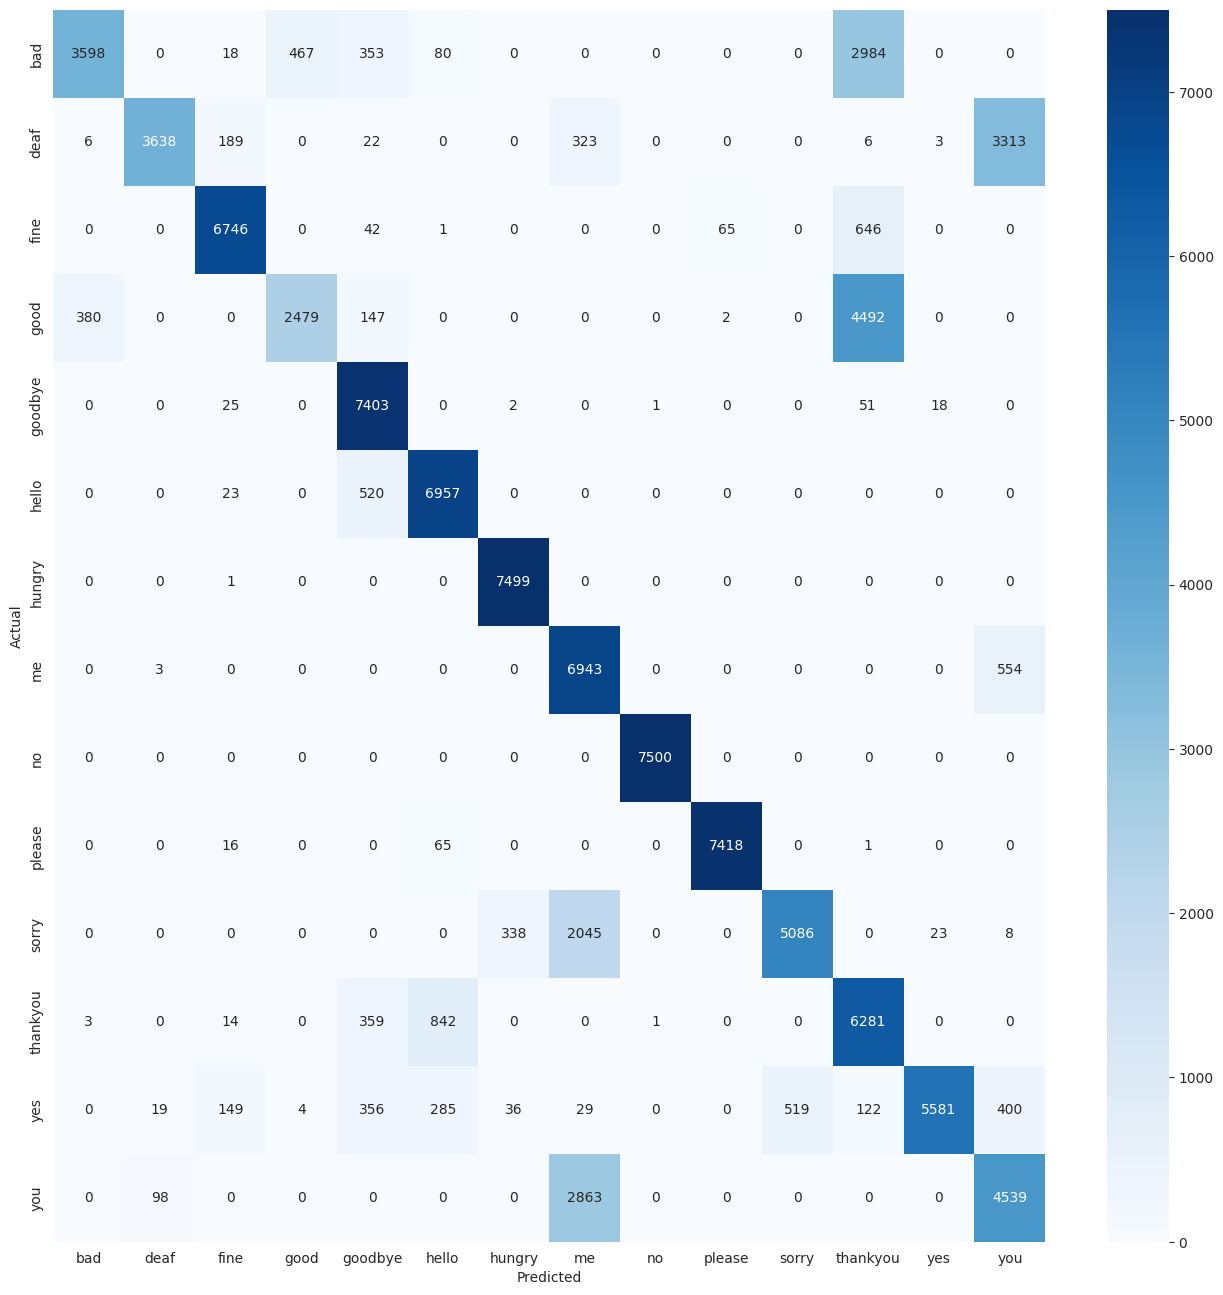

Accuracy: 77.78%


In [13]:
words_cm = confusion_matrix(words_y.argmax(axis=2).flatten(), words_y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(words_cm, annot=True, cmap='Blues', fmt='g', xticklabels=words_label_dict.keys(), yticklabels=words_label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(words_cm)) / np.sum(words_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [14]:
print(classification_report(words_y.argmax(axis=2).flatten(), words_y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.90      0.48      0.63      7500
           1       0.97      0.49      0.65      7500
           2       0.94      0.90      0.92      7500
           3       0.84      0.33      0.47      7500
           4       0.80      0.99      0.89      7500
           5       0.85      0.93      0.88      7500
           6       0.95      1.00      0.98      7500
           7       0.57      0.93      0.70      7500
           8       1.00      1.00      1.00      7500
           9       0.99      0.99      0.99      7500
          10       0.91      0.68      0.78      7500
          11       0.43      0.84      0.57      7500
          12       0.99      0.74      0.85      7500
          13       0.51      0.61      0.56      7500

    accuracy                           0.78    105000
   macro avg       0.83      0.78      0.78    105000
weighted avg       0.83      0.78      0.78    105000



# Static Test

In [15]:
static_X = static_df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
static_labels = static_df.iloc[:, -1]
static_label_dict = {label: i for i, label in enumerate(sorted(set(static_labels)))}
print(static_label_dict)
static_y = np.array([static_label_dict[label] for label in static_labels])
static_y = to_categorical(static_y, num_classes=len(static_label_dict))
print(static_X.shape, static_y.shape)
static_X = np.reshape(static_X, (static_X.shape[0]//150, 150, static_X.shape[1]))
static_y = np.reshape(static_y, (static_y.shape[0]//150, 150, static_y.shape[1]))
print(static_X.shape, static_y.shape)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'k': 9, 'l': 10, 'm': 11, 'n': 12, 'o': 13, 'p': 14, 'q': 15, 'r': 16, 's': 17, 't': 18, 'u': 19, 'v': 20, 'w': 21, 'x': 22, 'y': 23}
(180000, 11) (180000, 24)
(1200, 150, 11) (1200, 150, 24)


In [16]:
static_y_pred = static_model.predict(static_X)
static_predictions = np.argmax(static_y_pred, axis=2)
print(static_predictions)
static_major = mode(static_predictions, axis=1)[0].squeeze()
static_count = mode(static_predictions, axis=1)[1].squeeze()
print(f"Predictions    : {static_major}")
print(f"Appeared times : {static_count}")

2023-03-17 21:55:29.990032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-17 21:55:29.998915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-17 21:55:30.000944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

38/38 [==============================] - 2s 29ms/step
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [23 23 23 ... 23 23 23]
 [23 23 23 ... 23 23 23]
 [23 23 23 ... 23 23 23]]
Predictions    : [ 0  0  0 ... 23 23 23]
Appeared times : [150 150 150 ... 150 150 150]


/tmp/ipykernel_12934/1034647205.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  static_major = mode(static_predictions, axis=1)[0].squeeze()
/tmp/ipykernel_12934/1034647205.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  static_count = mode(static_predicti

In [17]:
static_predictions_list = []
for word in static_major:
    static_predictions_list.append(get_key(static_label_dict, word))
print(static_predictions_list)

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 's', 's', 's', 's', 's', 's', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 's', 's', 's', 's', 's', 's', 't', 'c', 's', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'm', 'm', 'm', 'm', 'm', 'd', 'o', 'o', 'c', 'o', 'k', 'k', 'k', 'k', 'k', 'n', 'n', 'n', 'n', 'n', 'c', 'c', 'c', 'c', 'c', 's', 'c', 'c', 'c', 'c', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'r', 'r', 'r', 'r', 'r', 'r', 'u', 'u', 'u', 'u', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'd', 'd', 'd', 'd', 'd', 't', 't', 't', 'd', 'd', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u',

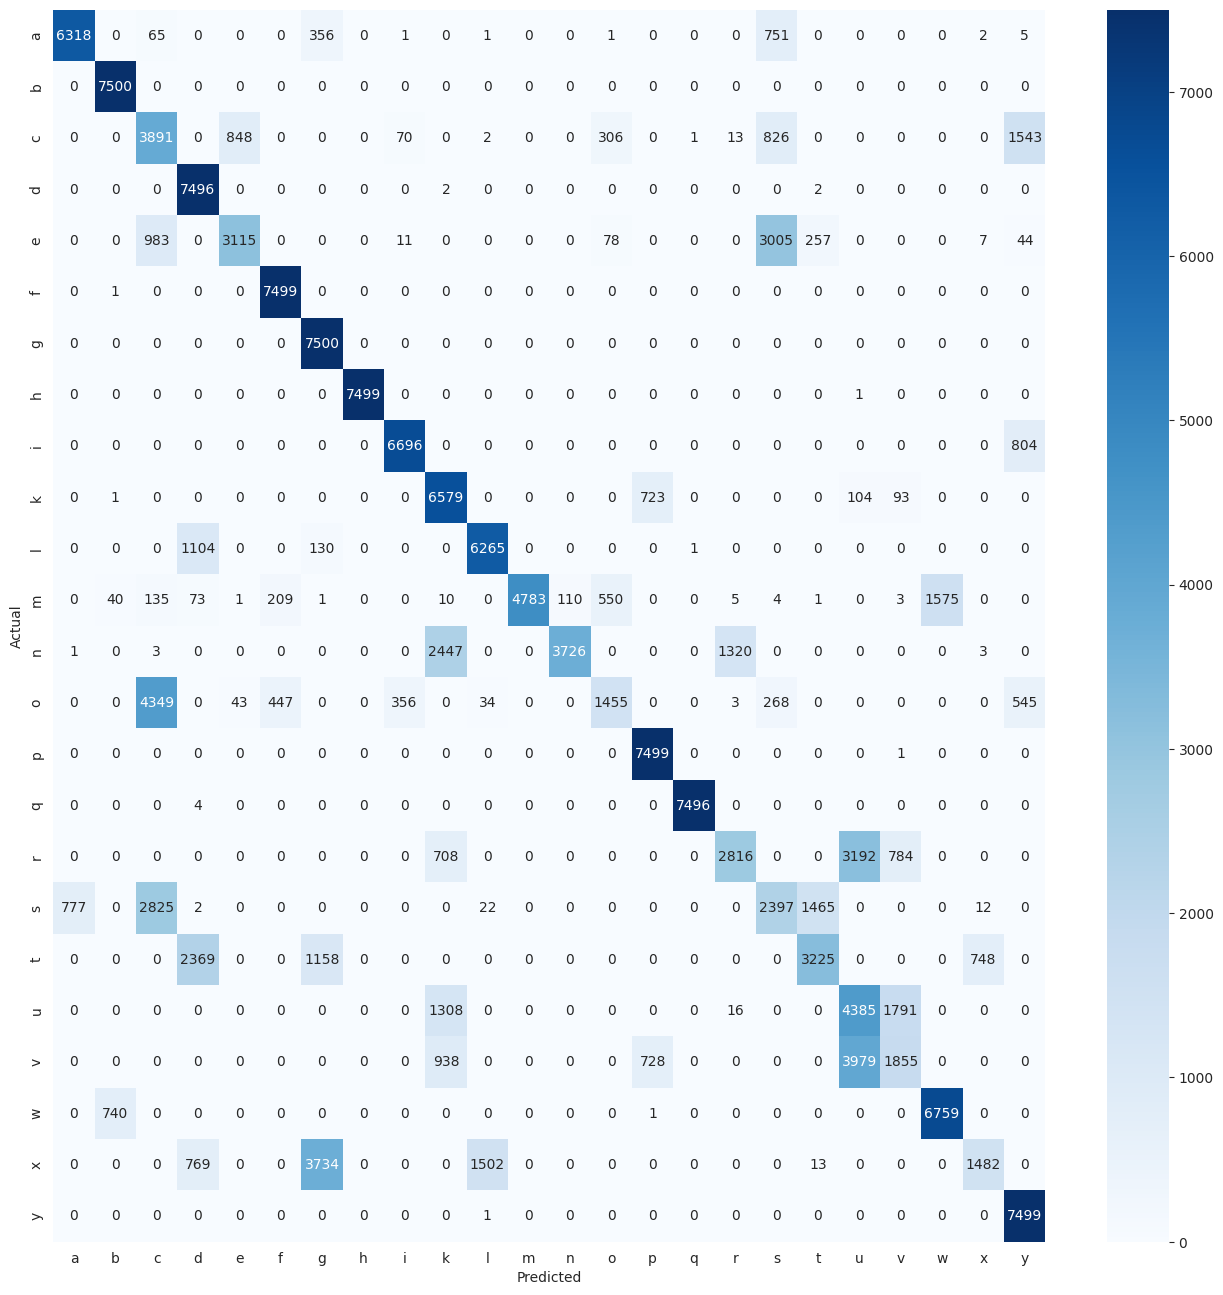

Accuracy: 69.85%


In [18]:
static_cm = confusion_matrix(static_y.argmax(axis=2).flatten(), static_y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(static_cm, annot=True, cmap='Blues', fmt='g', xticklabels=static_label_dict.keys(), yticklabels=static_label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(static_cm)) / np.sum(static_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [19]:
print(classification_report(static_y.argmax(axis=2).flatten(), static_y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      7500
           1       0.91      1.00      0.95      7500
           2       0.32      0.52      0.39      7500
           3       0.63      1.00      0.78      7500
           4       0.78      0.42      0.54      7500
           5       0.92      1.00      0.96      7500
           6       0.58      1.00      0.74      7500
           7       1.00      1.00      1.00      7500
           8       0.94      0.89      0.92      7500
           9       0.55      0.88      0.68      7500
          10       0.80      0.84      0.82      7500
          11       1.00      0.64      0.78      7500
          12       0.97      0.50      0.66      7500
          13       0.61      0.19      0.29      7500
          14       0.84      1.00      0.91      7500
          15       1.00      1.00      1.00      7500
          16       0.67      0.38      0.48      7500
          17       0.33    

# Dynamic Test

In [20]:
dynamic_X = dynamic_df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
dynamic_labels = dynamic_df.iloc[:, -1]
dynamic_label_dict = {label: i for i, label in enumerate(sorted(set(dynamic_labels)))}
print(dynamic_label_dict)
dynamic_y = np.array([dynamic_label_dict[label] for label in dynamic_labels])
dynamic_y = to_categorical(dynamic_y, num_classes=len(dynamic_label_dict))
print(dynamic_X.shape, dynamic_y.shape)
dynamic_X = np.reshape(dynamic_X, (dynamic_X.shape[0]//150, 150, dynamic_X.shape[1]))
dynamic_y = np.reshape(dynamic_y, (dynamic_y.shape[0]//150, 150, dynamic_y.shape[1]))
print(dynamic_X.shape, dynamic_y.shape)

{'bad': 0, 'deaf': 1, 'fine': 2, 'good': 3, 'goodbye': 4, 'hello': 5, 'hungry': 6, 'j': 7, 'me': 8, 'no': 9, 'please': 10, 'sorry': 11, 'thankyou': 12, 'yes': 13, 'you': 14, 'z': 15}
(120000, 11) (120000, 16)
(800, 150, 11) (800, 150, 16)


In [21]:
dynamic_y_pred = dynamic_model.predict(dynamic_X)
dynamic_predictions = np.argmax(dynamic_y_pred, axis=2)
print(dynamic_predictions)
dynamic_major = mode(dynamic_predictions, axis=1)[0].squeeze()
dynamic_count = mode(dynamic_predictions, axis=1)[1].squeeze()
print(f"Predictions    : {dynamic_major}")
print(f"Appeared times : {dynamic_count}")

2023-03-17 21:55:38.117751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-17 21:55:38.128465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-17 21:55:38.131294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 2s 37ms/step
[[ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]
 ...
 [ 4  4  4 ... 12 12 12]
 [ 4  4  4 ... 12 12 12]
 [ 4  4  4 ... 12 12 12]]
Predictions    : [ 7  7  7  7  7  7  7  7  7  7 15 15 15 15 15 15 15 15 15 15 15  8  8  8
  8  8 14  8  8  8  9  9  9  9  9  9  9  9  9  9 12  0 12  0 12 12 12  0
 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3 12 12 12  3  3
  3 12 12 12  4  4  5  4  5  4  4  5  4  4 11 11 11 13  8 11  8 11 11 11
  6  6  6  6  6  6  6  6  6  6 10 10 10 10 10 10 10 10 10 10  4  4  4  4
  4  4  4  4  4  4 12 12 12 12 12 12 12 12 12 12  7  7  7  7  3  4  4  4
  4  4  1  1  1  1  1 15 15 15 15 15  8  8  8  8 14  8  8 14  8  8  9  9
  9  9  9  9  9  9  9  9  0  0  0  0  0  0  4  0  0  0 13 13 13 13 13 13
 13 13 13 13 14 14 14 14 14 14 14 14 14 14  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  3  3  3  3 

/tmp/ipykernel_12934/2513195184.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  dynamic_major = mode(dynamic_predictions, axis=1)[0].squeeze()
/tmp/ipykernel_12934/2513195184.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  dynamic_count = mode(dynamic_pred

In [22]:
dynamic_predictions_list = []
for word in dynamic_major:
    dynamic_predictions_list.append(get_key(dynamic_label_dict, word))
print(dynamic_predictions_list)

['j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'me', 'me', 'me', 'me', 'me', 'you', 'me', 'me', 'me', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'thankyou', 'bad', 'thankyou', 'bad', 'thankyou', 'thankyou', 'thankyou', 'bad', 'thankyou', 'thankyou', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'good', 'thankyou', 'thankyou', 'thankyou', 'good', 'good', 'good', 'thankyou', 'thankyou', 'thankyou', 'goodbye', 'goodbye', 'hello', 'goodbye', 'hello', 'goodbye', 'goodbye', 'hello', 'goodbye', 'goodbye', 'sorry', 'sorry', 'sorry', 'yes', 'me', 'sorry', 'me', 'sorry', 'sorry', 'sorry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hun

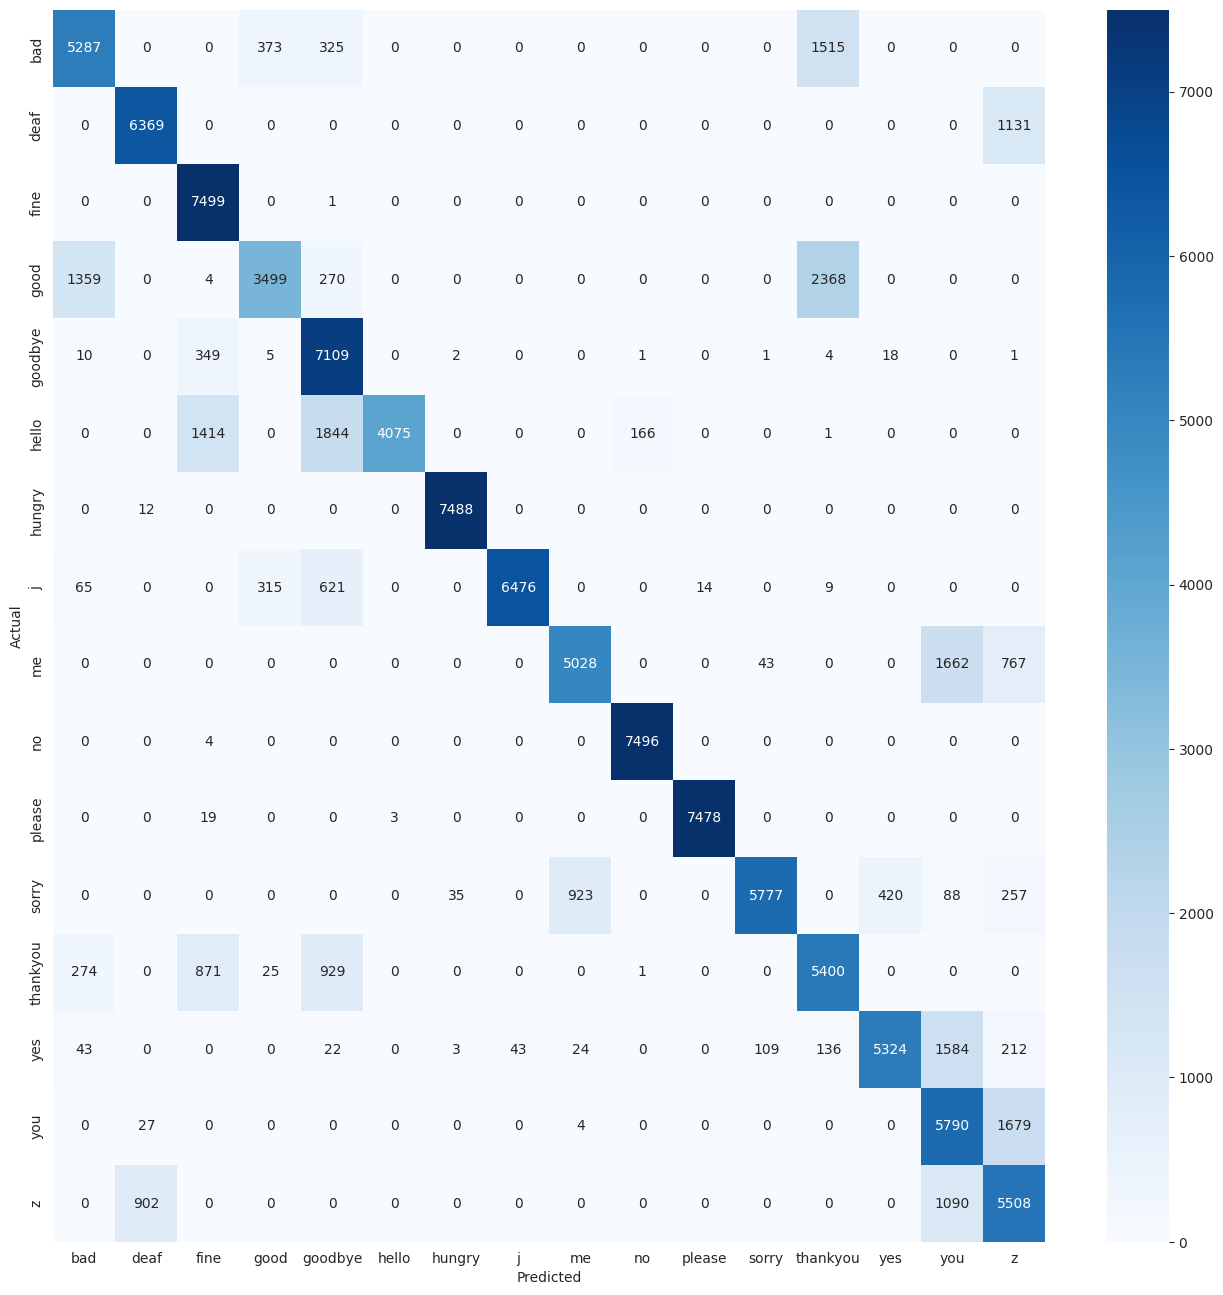

Accuracy: 79.67%


In [23]:
dynamic_cm = confusion_matrix(dynamic_y.argmax(axis=2).flatten(), dynamic_y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(dynamic_cm, annot=True, cmap='Blues', fmt='g', xticklabels=dynamic_label_dict.keys(), yticklabels=dynamic_label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(dynamic_cm)) / np.sum(dynamic_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [24]:
print(classification_report(dynamic_y.argmax(axis=2).flatten(), dynamic_y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73      7500
           1       0.87      0.85      0.86      7500
           2       0.74      1.00      0.85      7500
           3       0.83      0.47      0.60      7500
           4       0.64      0.95      0.76      7500
           5       1.00      0.54      0.70      7500
           6       0.99      1.00      1.00      7500
           7       0.99      0.86      0.92      7500
           8       0.84      0.67      0.75      7500
           9       0.98      1.00      0.99      7500
          10       1.00      1.00      1.00      7500
          11       0.97      0.77      0.86      7500
          12       0.57      0.72      0.64      7500
          13       0.92      0.71      0.80      7500
          14       0.57      0.77      0.65      7500
          15       0.58      0.73      0.65      7500

    accuracy                           0.80    120000
   macro avg       0.83   

# All Test

In [25]:
all_X = all_df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
all_labels = all_df.iloc[:, -1]
all_label_dict = {label: i for i, label in enumerate(sorted(set(all_labels)))}
print(all_label_dict)
all_y = np.array([all_label_dict[label] for label in all_labels])
all_y = to_categorical(all_y, num_classes=len(all_label_dict))
print(all_X.shape, all_y.shape)
all_X = np.reshape(all_X, (all_X.shape[0]//150, 150, all_X.shape[1]))
all_y = np.reshape(all_y, (all_y.shape[0]//150, 150, all_y.shape[1]))
print(all_X.shape, all_y.shape)

{'a': 0, 'b': 1, 'bad': 2, 'c': 3, 'd': 4, 'deaf': 5, 'e': 6, 'f': 7, 'fine': 8, 'g': 9, 'good': 10, 'goodbye': 11, 'h': 12, 'hello': 13, 'hungry': 14, 'i': 15, 'j': 16, 'k': 17, 'l': 18, 'm': 19, 'me': 20, 'n': 21, 'no': 22, 'o': 23, 'p': 24, 'please': 25, 'q': 26, 'r': 27, 's': 28, 'sorry': 29, 't': 30, 'thankyou': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35, 'y': 36, 'yes': 37, 'you': 38, 'z': 39}
(300000, 11) (300000, 40)
(2000, 150, 11) (2000, 150, 40)


In [26]:
all_y_pred = all_model.predict(all_X)
all_predictions = np.argmax(all_y_pred, axis=2)
print(all_predictions)
all_major = mode(all_predictions, axis=1)[0].squeeze()
all_count = mode(all_predictions, axis=1)[1].squeeze()
print(f"Predictions    : {all_major}")
print(f"Appeared times : {all_count}")

2023-03-17 21:55:43.189044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-17 21:55:43.196307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-17 21:55:43.203258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

63/63 [==============================] - 4s 38ms/step


2023-03-17 21:55:46.171274: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 48000000 exceeds 10% of free system memory.


[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [11 11 11 ... 31 31 31]
 [11 11 11 ... 31 31 31]
 [11 31 11 ... 31 31 31]]


/tmp/ipykernel_12934/3606571740.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  all_major = mode(all_predictions, axis=1)[0].squeeze()
/tmp/ipykernel_12934/3606571740.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  all_count = mode(all_predictions, axis=1)

Predictions    : [ 0  0  0 ... 31 31 31]
Appeared times : [150 150 150 ... 127 121 138]


In [27]:
all_predictions_list = []
for word in all_major:
    all_predictions_list.append(get_key(all_label_dict, word))
print(all_predictions_list)

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 's', 's', 's', 's', 'c', 'c', 'c', 'c', 'c', 'c', 'deaf', 'deaf', 'd', 'deaf', 'd', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'k', 'k', 'k', 'k', 'k', 'u', 'k', 'k', 'k', 'k', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'w', 'o', 'o', 'o', 'o', 'o', 'b', 'o', 'o', 'o', 'k', 'k', 'k', 'k', 'k', 'n', 'n', 'n', 'n', 'n', 'c', 'c', 'c', 'c', 'c', 'e', 's', 's', 'c', 'c', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'r', 'r', 'r', 'r', 'r', 'r', 'v', 'v', 'v', 'v', 's', 's', 's', 's', 's', 's', 'yes', 'yes', 's', 's', 'd', 'd', 'd', 'd', '

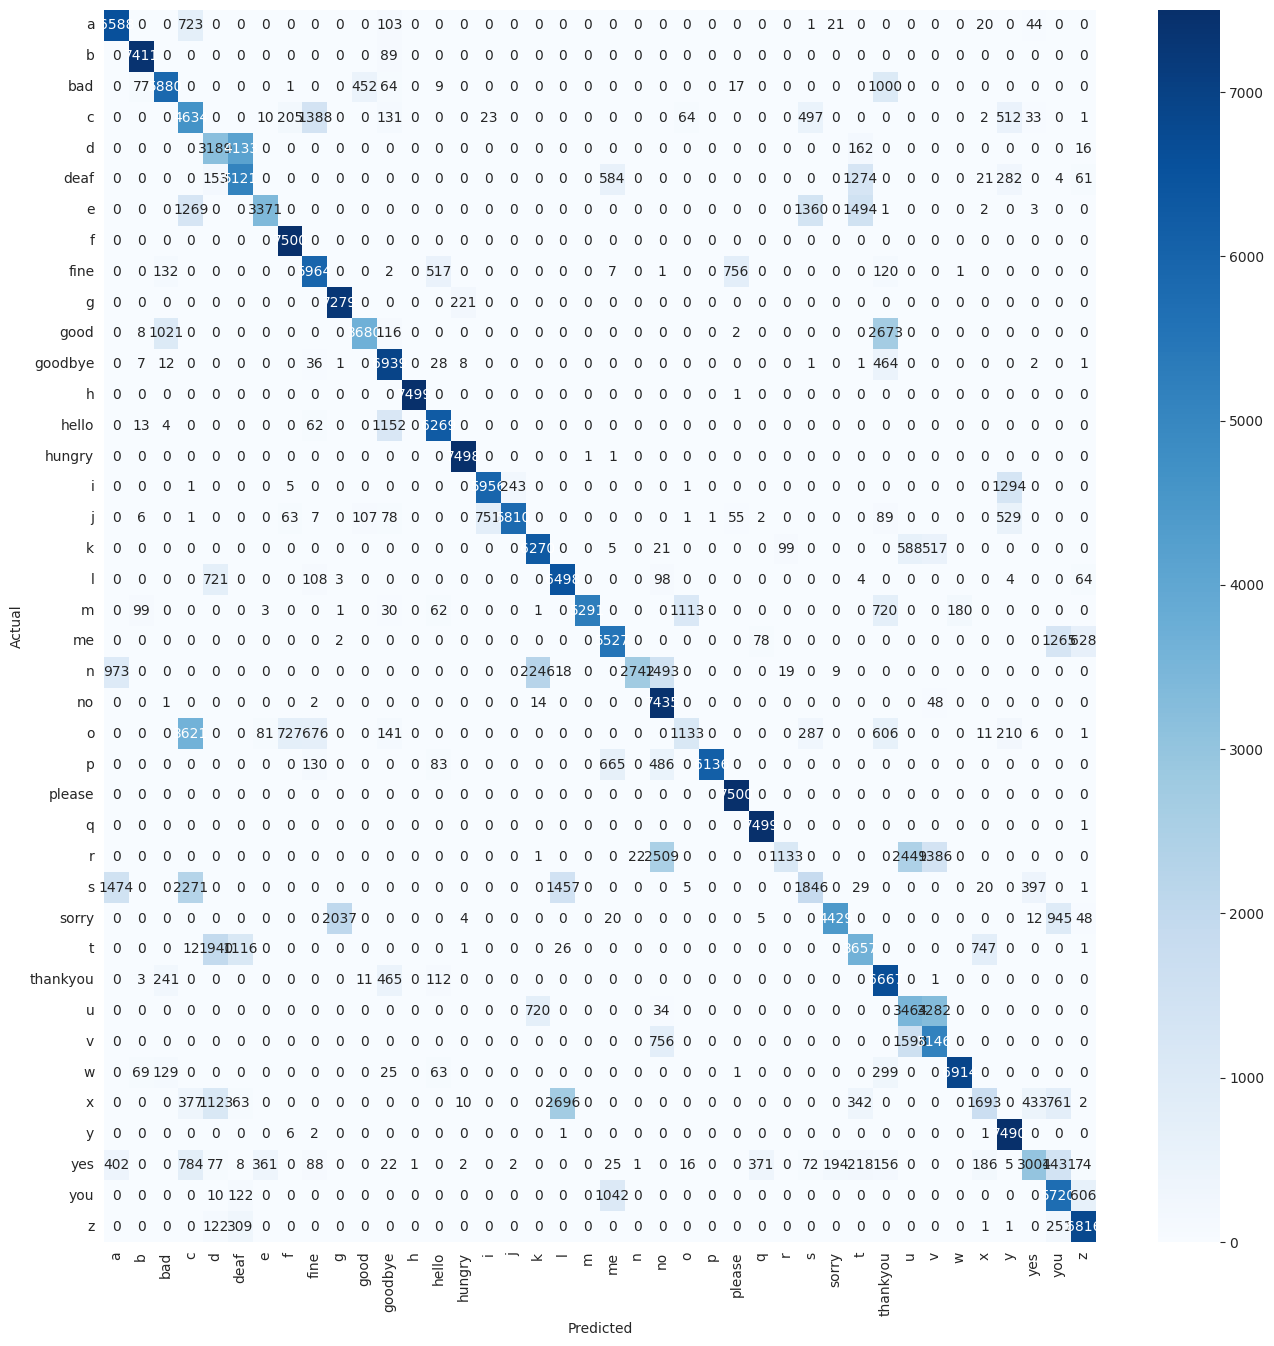

Accuracy: 71.53%


In [28]:
all_cm = confusion_matrix(all_y.argmax(axis=2).flatten(), all_y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(all_cm, annot=True, cmap='Blues', fmt='g', xticklabels=all_label_dict.keys(), yticklabels=all_label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(all_cm)) / np.sum(all_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [29]:
print(classification_report(all_y.argmax(axis=2).flatten(), all_y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      7500
           1       0.96      0.99      0.98      7500
           2       0.79      0.78      0.79      7500
           3       0.34      0.62      0.44      7500
           4       0.43      0.43      0.43      7500
           5       0.47      0.68      0.56      7500
           6       0.88      0.45      0.60      7500
           7       0.88      1.00      0.94      7500
           8       0.70      0.80      0.75      7500
           9       0.78      0.97      0.87      7500
          10       0.87      0.49      0.63      7500
          11       0.74      0.93      0.82      7500
          12       1.00      1.00      1.00      7500
          13       0.88      0.84      0.86      7500
          14       0.97      1.00      0.98      7500
          15       0.88      0.79      0.84      7500
          16       0.96      0.77      0.86      7500
          17       0.68    

# Text to sound

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(characters_predictions_list))
engine.runAndWait()

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(words_predictions_list))
engine.runAndWait()

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(static_predictions_list))
engine.runAndWait()

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(dynamic_predictions_list))
engine.runAndWait()

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(all_predictions_list))
engine.runAndWait()